In [35]:
import cv2
import glob
import os
import json
import matplotlib.pyplot as plt

In [36]:
##Definicion de funciones

    #Cargar frames de cada US video utilizando su path
def load_frames(video_path_pattern):
    frame_files = sorted(glob.glob(video_path_pattern))
    frames = [cv2.imread(frame_file) for frame_file in frame_files]
    return frames

    #Visualizar US videos utilizando los frames obtenidos
def display_video(frames, frame_rate=10):
    for frame in frames:
        cv2.imshow('Video', frame)
        if cv2.waitKey(int(1000 / frame_rate)) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

    #Mostrar los key frames de acuerdo al archivo .json
def display_key_frames(video_path_pattern, key_frame_indices):
    frame_files = sorted(glob.glob(video_path_pattern))
    key_frames = [cv2.imread(frame_files[i]) for i in key_frame_indices if 0 <= i < len(frame_files)]
    
    for frame in key_frames:
        cv2.imshow('Key Frame', frame)
        if cv2.waitKey(500) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

    # Contar el número total de frames de cada video
def count_frames_per_video(data, base_path):
    benign_frames = {}
    malignant_frames = {}

    for video in data['videos']:
        video_name = video['name']
        category = video_name.split('/')[0]
        video_path_pattern = os.path.join(base_path, video_name, '*.png')
        frames_count = len(sorted(glob.glob(video_path_pattern)))

        if category == 'benign':
            benign_frames[video_name] = frames_count
        elif category == 'malignant':
            malignant_frames[video_name] = frames_count

    return benign_frames, malignant_frames

    #Visualizar solo el primer video de beningn y de malignant
def visualize_first_video_of_each_category(data, base_path):
    categories = {'benign': None, 'malignant': None}

    # Iterar sobre los videos
    for video in data['videos']:
        category = video['name'].split('/')[0]
        if category in categories and categories[category] is None:
            video_name = video['name']
            video_path_pattern = os.path.join(base_path, video_name, '*.png')
            frames = load_frames(video_path_pattern)
            display_video(frames)
            categories[category] = video
            if all(categories.values()):
                break  # Break if we found videos for all categories


In [37]:
##Cargar la informacion de los archivos .json
with open('C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/imagenet_vid_train_15frames.json', 'r') as f:
    train_data = json.load(f)

with open('C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/imagenet_vid_val.json', 'r') as f:
    val_data = json.load(f)

In [38]:
'''
##Visualizar todos los videos de ultrasonido (reconstruccion a partir de los frames) del dataset
def visualize_videos(data, base_path):
    for video in data['videos']:
        video_name = video['name']
        video_path_pattern = os.path.join(base_path, video_name, '*.png')
        frames = load_frames(video_path_pattern)
        display_video(frames)

base_path_train = 'C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/rawframes'
base_path_val = 'C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/rawframes'

visualize_videos(train_data, base_path_train)
visualize_videos(val_data, base_path_val)
'''

"\n##Visualizar todos los videos de ultrasonido (reconstruccion a partir de los frames) del dataset\ndef visualize_videos(data, base_path):\n    for video in data['videos']:\n        video_name = video['name']\n        video_path_pattern = os.path.join(base_path, video_name, '*.png')\n        frames = load_frames(video_path_pattern)\n        display_video(frames)\n\nbase_path_train = 'C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/rawframes'\nbase_path_val = 'C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/rawframes'\n\nvisualize_videos(train_data, base_path_train)\nvisualize_videos(val_data, base_path_val)\n"

In [39]:
##Definir paths para los raw frames
base_path = 'C:/Users/Alessandra/Downloads/Miccai 2022 BUV Dataset/rawframes'

##Visualizacion del primer video de cada clase
visualize_first_video_of_each_category(train_data, base_path)

In [40]:
##Contar el número de frames para cada video en el dataset completo
benign_train_frames, malignant_train_frames = count_frames_per_video(train_data, base_path)
benign_val_frames, malignant_val_frames = count_frames_per_video(val_data, base_path)

'''
##Imprimir el número de frames para cada video
print("Número de frames en videos benignos (entrenamiento):")
for video, count in benign_train_frames.items():
    print(f"{video}: {count} frames")

print("\nNúmero de frames en videos malignos (entrenamiento):")
for video, count in malignant_train_frames.items():
    print(f"{video}: {count} frames")

print("\nNúmero de frames en videos benignos (validación):")
for video, count in benign_val_frames.items():
    print(f"{video}: {count} frames")

print("\nNúmero de frames en videos malignos (validación):")
for video, count in malignant_val_frames.items():
    print(f"{video}: {count} frames")
'''

print(f"\nCantidad de videos benignos (entrenamiento): {len(benign_train_frames)}")
print(f"Cantidad de videos malignos (entrenamiento): {len(malignant_train_frames)}")
print(f"Cantidad de videos benignos (validación): {len(benign_val_frames)}")
print(f"Cantidad de videos malignos (validación): {len(malignant_val_frames)}")


Cantidad de videos benignos (entrenamiento): 61
Cantidad de videos malignos (entrenamiento): 88
Cantidad de videos benignos (validación): 13
Cantidad de videos malignos (validación): 24


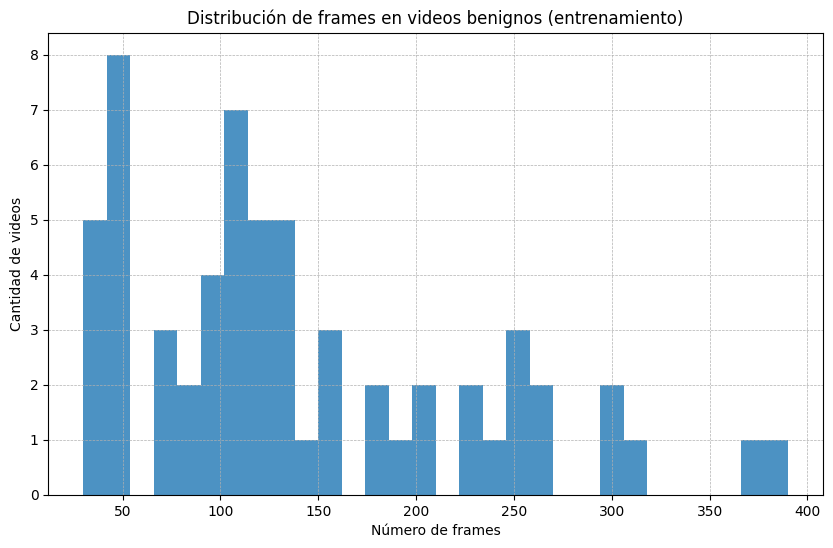

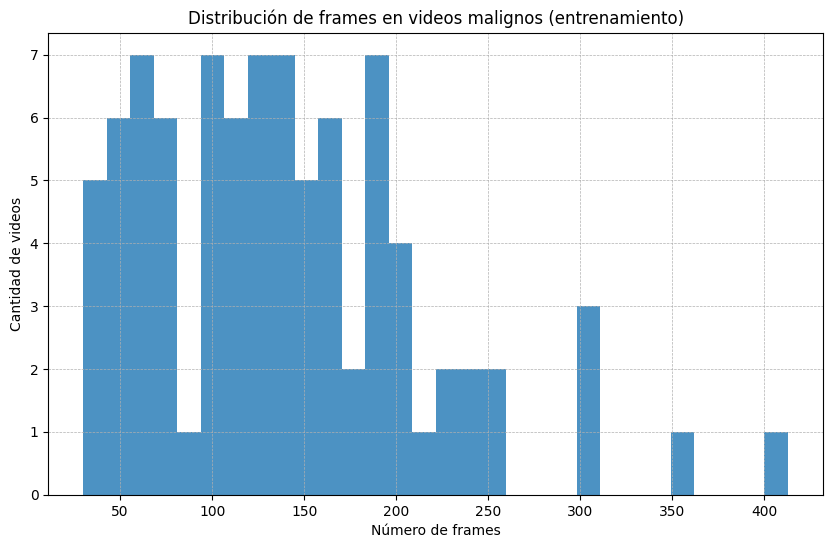

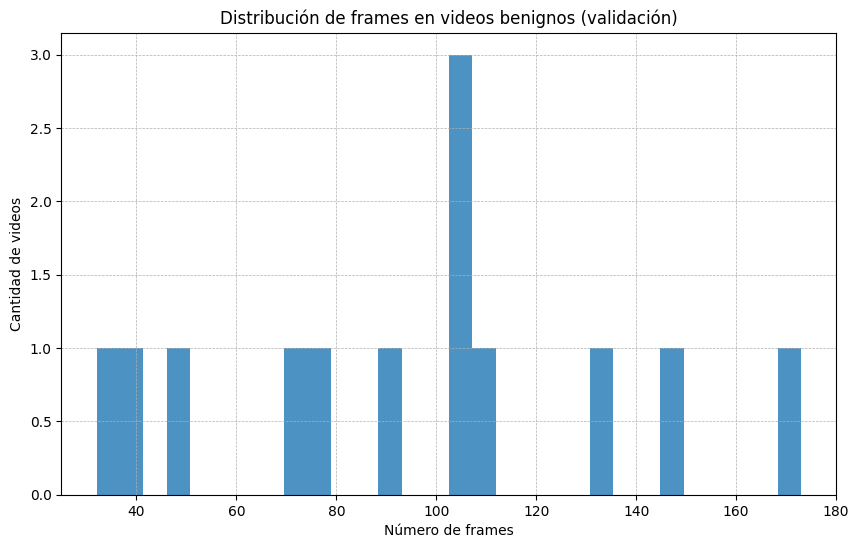

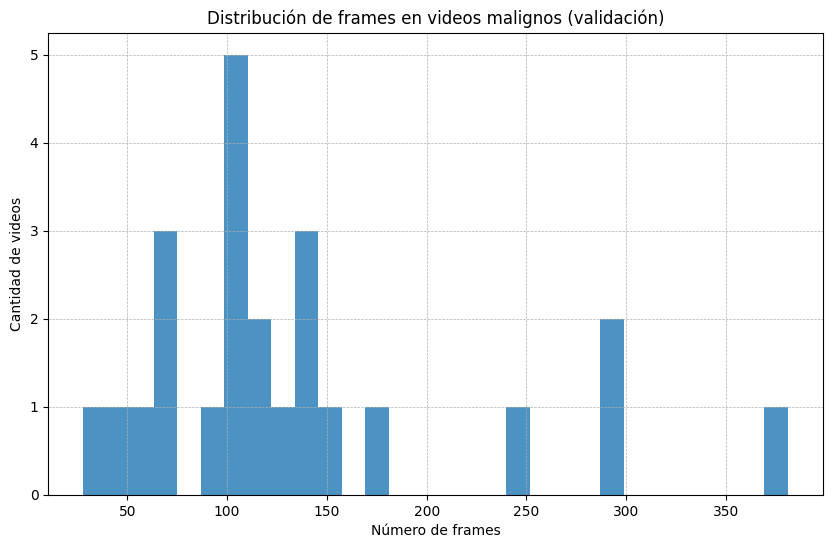

In [55]:
##Graficar la distribución del número de frames en cada diccionario
def plot_frame_distribution(frame_counts, title):
    plt.figure(figsize=(10, 6))
    plt.hist(frame_counts.values(), bins=30, alpha=0.8)
    plt.title(title)
    plt.xlabel('Número de frames')
    plt.ylabel('Cantidad de videos')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
    
    plt.show()

plot_frame_distribution(benign_train_frames, 'Distribución de frames en videos benignos (entrenamiento)')
plot_frame_distribution(malignant_train_frames, 'Distribución de frames en videos malignos (entrenamiento)')
plot_frame_distribution(benign_val_frames, 'Distribución de frames en videos benignos (validación)')
plot_frame_distribution(malignant_val_frames, 'Distribución de frames en videos malignos (validación)')

In [ ]:
#TO-DO
#Resizear frames
#Normalizar valores de pixeles
#Algun preprocesamiento adicional
#Escoger una arquitectura de DL (Quizas la que sea "mejor extrayendo caracteristicas de imagenes")
#Modelar el modelo con el training dataset
#   -Definir loss functions
#   -Metricas de evaluacion
#Evaluar el performance del modelo entrenado usando el validation set
#   -Verificar metricas
#Ajustar hiperparametros 
#Testear el modelo en un set de testeo